In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gold_data=pd.read_csv("Gold Futures Historical Data (23.01.24-22.11.24).csv")


In [3]:
gold_data

,Date,Price,Open,High,Low,Vol.,Change %
0,11/22/2024,"2,699.70","2,671.20","2,701.60","2,670.85",NaN,0.93%
1,11/21/2024,"2,674.90","2,653.50","2,676.50","2,651.60",186.30K,0.87%
2,11/20/2024,"2,651.70","2,635.80","2,659.00","2,621.90",182.01K,0.79%
3,11/19/2024,"2,631.00","2,616.30","2,643.40","2,614.20",202.24K,0.63%
4,11/18/2024,"2,614.60","2,571.50","2,619.50","2,568.50",195.29K,1.73%
...,...,...,...,...,...,...,...
212,01/29/2024,"2,025.40","2,024.40","2,037.20","2,018.80",150.71K,0.40%
213,01/26/2024,"2,017.30","2,021.00","2,028.10","2,015.60",119.59K,-0.02%
214,01/25/2024,"2,017.80","2,014.80","2,025.60","2,004.00",196.67K,0.09%
215,01/24/2024,"2,016.00","2,030.70","2,037.90","2,011.70",234.46K,-0.48%


In [4]:
for col in ["Open", "Price", "High", "Low"]:
    gold_data[col] = gold_data[col].str.replace(",", "", regex=False)
    gold_data[col] = pd.to_numeric(gold_data[col], errors="coerce")


In [5]:
gold_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/22/2024,2699.7,2671.2,2701.6,2670.85,NaN,0.93%
1,11/21/2024,2674.9,2653.5,2676.5,2651.60,186.30K,0.87%
2,11/20/2024,2651.7,2635.8,2659.0,2621.90,182.01K,0.79%
3,11/19/2024,2631.0,2616.3,2643.4,2614.20,202.24K,0.63%
4,11/18/2024,2614.6,2571.5,2619.5,2568.50,195.29K,1.73%


In [6]:
gold_data["Vol."] = gold_data["Vol."].replace("-", np.nan)  # replace dashes with NaN

gold_data["Vol."] = gold_data["Vol."].str.replace("K", "e3", regex=False)
gold_data["Vol."] = gold_data["Vol."].str.replace("M", "e6", regex=False)

gold_data["Vol."] = pd.to_numeric(gold_data["Vol."], errors="coerce")


In [7]:
gold_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/22/2024,2699.7,2671.2,2701.6,2670.85,NaN,0.93%
1,11/21/2024,2674.9,2653.5,2676.5,2651.60,186300.0,0.87%
2,11/20/2024,2651.7,2635.8,2659.0,2621.90,182010.0,0.79%
3,11/19/2024,2631.0,2616.3,2643.4,2614.20,202240.0,0.63%
4,11/18/2024,2614.6,2571.5,2619.5,2568.50,195290.0,1.73%


In [8]:
gold_data["Change %"] = gold_data["Change %"].str.replace("%", "", regex=False)
gold_data["Change %"] = pd.to_numeric(gold_data["Change %"], errors="coerce")


In [9]:
gold_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/22/2024,2699.7,2671.2,2701.6,2670.85,NaN,0.93
1,11/21/2024,2674.9,2653.5,2676.5,2651.60,186300.0,0.87
2,11/20/2024,2651.7,2635.8,2659.0,2621.90,182010.0,0.79
3,11/19/2024,2631.0,2616.3,2643.4,2614.20,202240.0,0.63
4,11/18/2024,2614.6,2571.5,2619.5,2568.50,195290.0,1.73


In [10]:
gold_data = gold_data.fillna(0)
gold_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/22/2024,2699.7,2671.2,2701.6,2670.85,0.0,0.93
1,11/21/2024,2674.9,2653.5,2676.5,2651.60,186300.0,0.87
2,11/20/2024,2651.7,2635.8,2659.0,2621.90,182010.0,0.79
3,11/19/2024,2631.0,2616.3,2643.4,2614.20,202240.0,0.63
4,11/18/2024,2614.6,2571.5,2619.5,2568.50,195290.0,1.73


In [11]:
gold_data.shape

(217, 7)

In [12]:
gold_data.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [13]:
gold_data["Date"].min(),gold_data["Date"].max()

('01/23/2024', '11/22/2024')

In [14]:
gold_data["Price"].mean()

np.float64(2387.9502304147463)

In [15]:
gold_data["Price"].idxmax()

17

In [16]:
gold_data.iloc[17]

Date        10/30/2024
Price           2800.8
Open            2786.9
High            2801.8
Low             2782.4
Vol.          191550.0
Change %          1.16
Name: 17, dtype: object

In [17]:
gold_data["Price"].idxmin()
gold_data.iloc[200]


Date        02/14/2024
Price           1994.7
Open            1994.9
High            1998.7
Low             1987.2
Vol.            1630.0
Change %         -0.15
Name: 200, dtype: object

In [18]:
gold_data["Change %"].mean()

np.float64(0.13746543778801842)

In [19]:
gold_data["Change %"].value_counts()

Change %
 0.13    4
 0.35    4
 0.76    3
 1.16    3
 0.05    3
        ..
 0.42    1
-0.54    1
-0.84    1
 0.80    1
 0.09    1
Name: count, Length: 157, dtype: int64

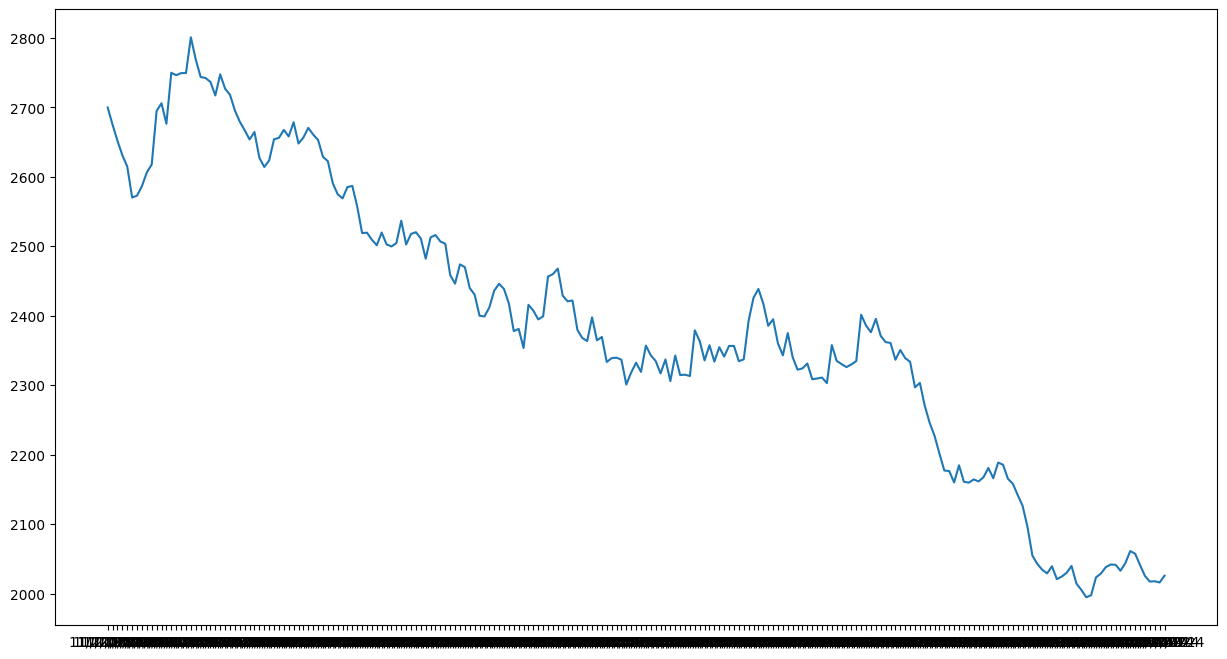

In [20]:
plt.figure(figsize=(15,8))
plt.plot(gold_data["Date"],gold_data["Price"])
plt.show()

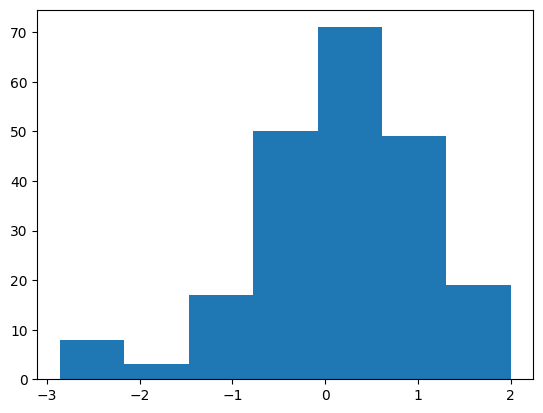

In [21]:
plt.hist(gold_data["Change %"],bins=7)
plt.show()

<Axes: xlabel='Date'>

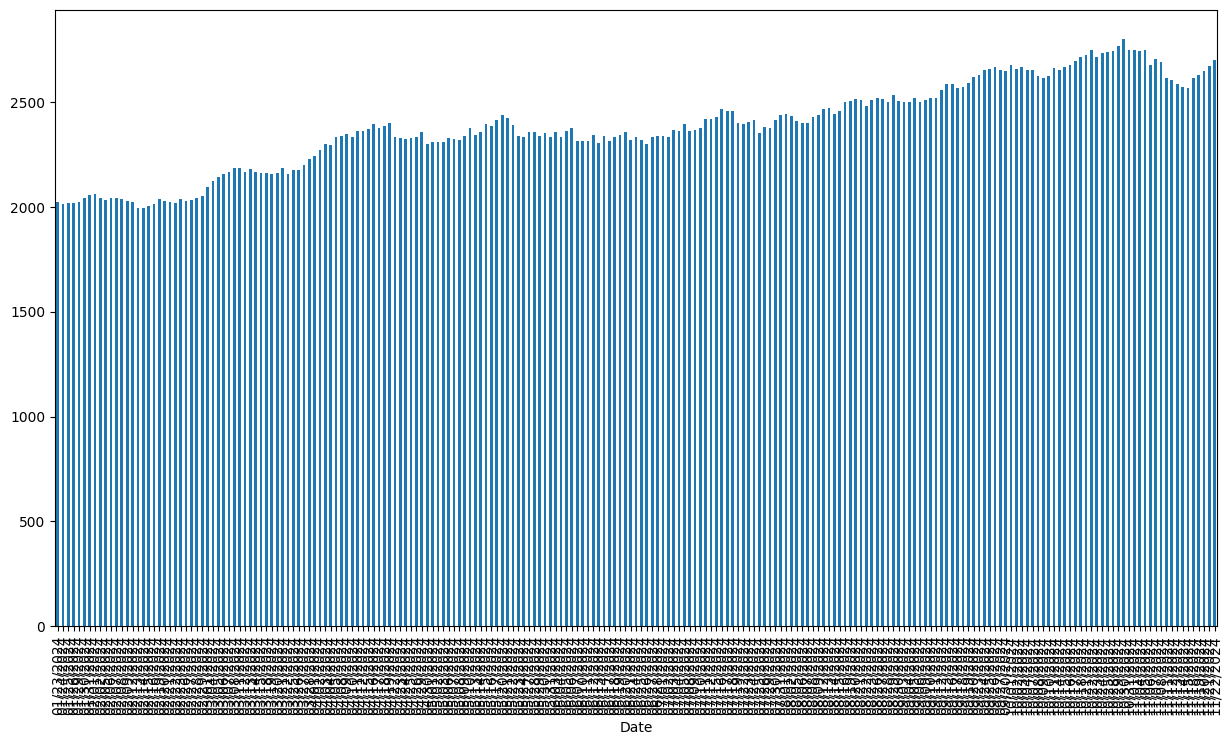

In [22]:
plt.figure(figsize=(15,8))

gold_data.groupby(gold_data["Date"])["Price"].mean().plot(kind="bar")

In [26]:
import datetime as dt
# convert Date column to datetime
gold_data["Date"] = pd.to_datetime(gold_data["Date"], errors="coerce")

gold_data.groupby(gold_data["Date"].dt.year)["Price"].mean()

Date
2024    2387.95023
Name: Price, dtype: float64

In [28]:
gold_data.groupby(gold_data["Date"].dt.year)["Price"].max()

Date
2024    2800.8
Name: Price, dtype: float64

In [30]:
gold_data.groupby(gold_data["Date"].dt.month)["Price"].mean()

Date
1     2028.685714
2     2030.433333
3     2167.455000
4     2338.422727
5     2356.291304
6     2333.150000
7     2398.082609
8     2473.900000
9     2578.735000
10    2695.191304
11    2659.212500
Name: Price, dtype: float64

In [31]:
gold_data.groupby(gold_data["Date"].dt.month)["Price"].max()

Date
1     2057.4
2     2061.2
3     2227.1
4     2401.4
5     2438.5
6     2378.9
7     2467.8
8     2536.7
9     2670.4
10    2800.8
11    2749.7
Name: Price, dtype: float64

In [34]:
gold_data.groupby(gold_data["Date"].dt.year)["Change %"].mean()

Date
2024    0.137465
Name: Change %, dtype: float64

In [36]:
gold_data.groupby(gold_data["Date"].dt.year)["Vol."].mean()

Date
2024    91805.069124
Name: Vol., dtype: float64

In [37]:
gold_data.groupby(gold_data["Date"].dt.day_name())["Price"].mean()

Date
Friday       2397.960465
Monday       2385.369048
Thursday     2389.538636
Tuesday      2382.920455
Wednesday    2384.072727
Name: Price, dtype: float64

In [43]:
gold_data.describe(include="all")


,Date,Price,Open,High,Low,Vol.,Change %
count,217,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,2024-06-23 06:24:53.087557632,2387.950230,2386.220968,2403.782028,2370.633180,91805.069124,0.137465
min,2024-01-23 00:00:00,1994.700000,1994.900000,1998.700000,1987.200000,0.000000,-2.860000
25%,2024-04-09 00:00:00,2305.900000,2306.300000,2325.200000,2291.700000,780.000000,-0.320000
50%,2024-06-24 00:00:00,2375.000000,2371.000000,2394.300000,2356.000000,3570.000000,0.190000
75%,2024-09-09 00:00:00,2519.700000,2522.000000,2536.100000,2505.700000,196670.000000,0.780000
max,2024-11-22 00:00:00,2800.800000,2799.100000,2801.800000,2782.400000,391750.000000,2.000000
std,NaN,207.300823,207.644963,208.947003,205.423414,115262.995074,0.929762


In [44]:
# Central tendency
print("Mean Price:", gold_data["Price"].mean())
print("Median Price:", gold_data["Price"].median())
print("Mode Price:", gold_data["Price"].mode()[0])

# Spread
print("Price Standard Deviation:", gold_data["Price"].std())
print("Price Variance:", gold_data["Price"].var())
print("Price Range:", gold_data["Price"].max() - gold_data["Price"].min())


Mean Price: 2387.9502304147463
Median Price: 2375.0
Mode Price: 2336.6
Price Standard Deviation: 207.30082277364903
Price Variance: 42973.63112263185
Price Range: 806.1000000000001


In [45]:
print("Skewness of Price:", gold_data["Price"].skew())
print("Kurtosis of Price:", gold_data["Price"].kurt())


Skewness of Price: -0.12663722196810973
Kurtosis of Price: -0.6858580584986265
